In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sin, cos, sqrt, exp
import yfinance as yf
from datetime import datetime, timedelta
import json

def trigfit(x, n, w, m, a, b, xm):
    Sc =0.0
    Ss =0.0
    Scc=0.0
    Sss=0.0
    Scs=0.0
    Sx =0.0
    Sxc=0.0
    Sxs=0.0
    for i in range(n):
        c = cos(w*i)
        s = sin(w*i)
        dx = x[i] - xm[i]
        Sc +=c
        Ss +=s
        Scc+=c*c
        Sss+=s*s
        Scs+=c*s
        Sx +=dx
        Sxc+=dx*c
        Sxs+=dx*s
    Sc /=n
    Ss /=n
    Scc/=n
    Sss/=n
    Scs/=n
    Sx /=n
    Sxc/=n
    Sxs/=n   
    if w == 0 or None:
        m = Sx
        a = 0.0
        b = 0.0
    else:
        den=(Scs-Sc*Ss)**2-(Scc-Sc*Sc)*(Sss-Ss*Ss)
        a=((Sxs-Sx*Ss)*(Scs-Sc*Ss)-(Sxc-Sx*Sc)*(Sss-Ss*Ss))/den
        b=((Sxc-Sx*Sc)*(Scs-Sc*Ss)-(Sxs-Sx*Ss)*(Scc-Sc*Sc))/den
        m=Sx-a*Sc-b*Ss
    return w, m, a ,b 
def freq(x, n, w, m, a, b, xm):
    FreqTOL =0.00001
    z = [None] * n
    alpha = 0.0 # = beta for initialization
    beta = 2.0
    z[0] = x[0] - xm[0]
    while abs(alpha - beta) > FreqTOL:
        alpha = beta
        z[1] = x[1] = xm[1] + alpha * z[0]
        num = z[0] * z[1]
        den = z[0] * z[0]
        for i in range(2, n):
            z[i] = x[i] - xm[i] + alpha*z[i-1] - z[i-2]
            num += z[i-1]*(z[i]+z[i-2])
            den+=z[i-1]*z[i-1]
        beta = num/den
    if -1 <= beta/2.0 <= 1:
        w = np.arccos(beta/2.0)
    else:
        w= 0 
    w, m, a, b = trigfit(x, n, w, m, a, b, xm)
    return w, m, a, b


def main(df_close_unpivoted, ticker):
    shop = df_close_unpivoted[ticker]
    av = 0.0

    past = 252
    pred = 100
    # past closed price
    x = [None] * past
    close = shop
    close = close[::-1]
    # average price for the past 300(past) days
    xm = [None] * past
    ym = [None] * 101
    for i in range(past):
        x[i] = close[i]
        av += x[i]
    av/=past

    for i in range(past):
        xm[i] = av
        if(i <= pred):
            ym[i] = av
    harmonics = 20
    w = 0.0
    m = 0.0
    a = 0.0
    b = 0.0
    for i in range(1, harmonics + 1):
        w, m, a, b = freq(x, past, w, m, a, b, xm)
        for i in range(past):
            xm[i] += m+a*cos(w*i) + b*sin(w*i)
            if(i <= pred):
                ym[i] += m+a*cos(w*i)-b*sin(w*i)
    return ym

def getNavSeries(df_now_for_nav, weighting=[0.2] * 5, nav_current = 1):
    df2 = (1 + df_now_for_nav.pct_change()).cumprod()
    df3 = df2.fillna(1)
    df4 = df3*nav_current
    nav_series = np.sum(df4 * weighting, axis=1)
    return nav_series


2022-09-01 ~ 2024-06-03


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_13885/3887049089.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[i] = close[i]


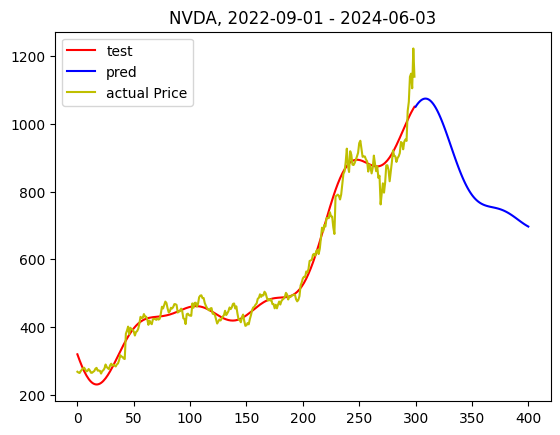

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sin, cos, sqrt, exp
import yfinance as yf
from datetime import datetime, timedelta

def trigfit(x, n, w, m, a, b, xm):
    Sc =0.0
    Ss =0.0
    Scc=0.0
    Sss=0.0
    Scs=0.0
    Sx =0.0
    Sxc=0.0
    Sxs=0.0
    for i in range(n):
        c = cos(w*i)
        s = sin(w*i)
        dx = x[i] - xm[i]
        Sc +=c
        Ss +=s
        Scc+=c*c
        Sss+=s*s
        Scs+=c*s
        Sx +=dx
        Sxc+=dx*c
        Sxs+=dx*s
    Sc /=n
    Ss /=n
    Scc/=n
    Sss/=n
    Scs/=n
    Sx /=n
    Sxc/=n
    Sxs/=n   
    if w == 0 or None:
        m = Sx
        a = 0.0
        b = 0.0
    else:
        den=(Scs-Sc*Ss)**2-(Scc-Sc*Sc)*(Sss-Ss*Ss)
        a=((Sxs-Sx*Ss)*(Scs-Sc*Ss)-(Sxc-Sx*Sc)*(Sss-Ss*Ss))/den
        b=((Sxc-Sx*Sc)*(Scs-Sc*Ss)-(Sxs-Sx*Ss)*(Scc-Sc*Sc))/den
        m=Sx-a*Sc-b*Ss
    return w, m, a ,b 
def freq(x, n, w, m, a, b, xm):
    FreqTOL =0.00001
    z = [None] * n
    alpha = 0.0 # = beta for initialization
    beta = 2.0
    z[0] = x[0] - xm[0]
    while abs(alpha - beta) > FreqTOL:
        alpha = beta
        z[1] = x[1] = xm[1] + alpha * z[0]
        num = z[0] * z[1]
        den = z[0] * z[0]
        for i in range(2, n):
            z[i] = x[i] - xm[i] + alpha*z[i-1] - z[i-2]
            num += z[i-1]*(z[i]+z[i-2])
            den+=z[i-1]*z[i-1]
        beta = num/den
    if -1 <= beta/2.0 <= 1:
        w = np.arccos(beta/2.0)
    else:
        w= 0 
    w, m, a, b = trigfit(x, n, w, m, a, b, xm)
    return w, m, a, b


def main(ticker, shop, day=0):
    start = datetime.now() - timedelta(days=441+day)
    end = datetime.now()
    print(start.strftime("%Y-%m-%d"), "~", end.strftime("%Y-%m-%d"))
    shop = yf.download(ticker, start= start, end = end, interval = "1d", progress=False)
    av = 0.0

    past = 300
    pred = 100
    # past closed price
    x = [None] * 300
    close = shop['Close']
    close = close[::-1]
    # average price for the past 300(past) days
    xm = [None] * 300
    ym = [None] * 101
    for i in range(past):
        x[i] = close[i]
        av += x[i]
    av/=past

    for i in range(past):
        xm[i] = av
        if(i <= pred):
            ym[i] = av
    harmonics = 20
    w = 0.0
    m = 0.0
    a = 0.0
    b = 0.0
    for i in range(1, harmonics + 1):
        w, m, a, b = freq(x, past, w, m, a, b, xm)
        for i in range(past):
            xm[i] += m+a*cos(w*i) + b*sin(w*i)
            if(i <= pred):
                ym[i] += m+a*cos(w*i)-b*sin(w*i)

    plt.plot(np.arange(0, len(xm), 1), xm[::-1], color ='r', label="test")
    plt.plot(np.arange(len(xm), len(xm) + len(ym), 1), ym, color = "blue", label="pred")
    plt.plot(np.arange(0, len(xm), 1), x[::-1], color='y', label='actual Price')
    plt.title(f"{ticker}, {start.strftime('%Y-%m-%d')} - {end.strftime('%Y-%m-%d')}")
    plt.legend()
    plt.show()

main("NVDA", 200, 200)

In [2]:
import pandas as pd
df = pd.read_csv("constituents.csv")
symbols = list(df['Symbol'])
df_close_unpivoted = yf.download(symbols[:], start='2023-05-01')['Adj Close']
df_close_unpivoted.dropna(how='any', axis=1, inplace=True)

[*********************100%%**********************]  501 of 501 completed


In [6]:
# factor data are aligned with the date of calculation, all factors needs to be shift 1 for actual usage
factor_lists = []
row_elements = []
for ticker in list(df_close_unpivoted.columns):
    ym = main(df_close_unpivoted=df_close_unpivoted, ticker=ticker)
    r = np.polyfit(np.arange(0, len(ym), 1), ym, 1)[0]
    row_elements.append(r) # all tickers for each day
factor_lists.append(row_elements)
a = pd.DataFrame(factor_lists).T

/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_16782/2878468050.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x[i] = close[i]


In [11]:
transed = a.T
transed.columns = df_close_unpivoted.columns
transed

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,-0.241717,0.010634,-0.264803,-0.062454,0.016608,-0.146434,-0.181355,0.03484,0.751051,-0.255646,...,-0.4084,-0.026208,-0.050559,-0.051606,-0.118923,-0.338021,-0.18071,-0.019751,-0.815381,-0.145502


In [17]:
all_regression_data = transed.T.sort_values(by=0, ascending=False)
top10 = all_regression_data[:5]
last10 = all_regression_data[-5:]
top10, df_close_unpivoted.index[-1], last10

(               0
 Ticker          
 ULTA    1.708141
 PAYC    1.703554
 CHTR    1.279752
 BIO     1.128705
 LULU    1.020437,
 Timestamp('2024-06-03 00:00:00'),
                 0
 Ticker           
 AVGO    -3.958659
 FICO    -3.979526
 BKNG    -5.657852
 CMG     -6.595352
 NVR    -16.619924)